# No Infection Sims

This is primarily to test the properties of the movement between temporal sims and snapshot sims.
My hypothesis here is that, without infection, we _should_ see that the movement is identical.
    I _suspect_ that the movement is not necessarily identical, since we lose information in the snapshot sims
We will define a common set of parameters to use - in this case (0.0, 0.0), which represents 0.0 rate of infection, and 0.0 rate of recovery/removal.

We should do N repeats on identical initial conditions.

In [1]:
import graph_importer as gim
import do_simulation_on_network as dosim
import on_network_simulation as ons
import examine_transfers_for_sizes as esz

In [2]:
reload(ons)

<module 'on_network_simulation' from '/home/davidwu/REPOS/echidna_network/on_network_simulation.py'>

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# loading in the networks

G = gim.make_graph("./concordant_networks/temponet_14_365.lgl")
snapshots = ons.load_snapshots("./conc_tempo_14_detailed/")
szs = dosim.find_sizes("./concordant_networks/size_14.csv", temporal_graph=None)
prob_final = dosim.load_prob_final_file("./probability_of_final_stay_by_shuffled_campus.csv")

In [5]:
params = (0.0, 0.0)

In [6]:
N = len(szs)

    choose random hospital
    seed with some proportion of total capacity
    run the sim and observe the movements in and out of each hospital
    
    

In [7]:
sz_arr = np.array([int(v) for k,v in sorted(szs.items())], dtype=np.int32)

seeding_value = np.ceil(sz_arr/2).astype(np.int32)

In [8]:
def seed_(i, n=N, vals=seeding_value):
    x = np.zeros((N, 1))
    x[i] = vals[i]
    return x

In [9]:
temporal_sim_frame = ons.TemporalNetworkSimulation(
    szs, 
    G, 
    prob_final, 
    params, 
    track_movers=True, 
    dt=0.2,
)

/home/davidwu/.virtualenvs/monv/lib/python3.10/site-packages/scipy/sparse/_base.py:659: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


In [10]:
temporal_sim_frame.seed(0, 0)
temporal_sim_frame.reset()

In [11]:
temporal_sim_frame.state = seed_(58)
temporal_sim_frame._history[0] = temporal_sim_frame.state

In [12]:
temporal_sim_frame.prob_final_stay *= 0.0

In [13]:
temporal_sim_frame.simulate(365*3, nostop=True)

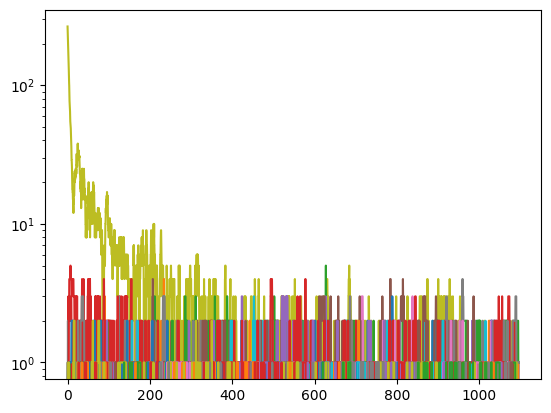

In [14]:
plt.semilogy(temporal_sim_frame.ts, temporal_sim_frame.history.T);

In [16]:
xx, tt = np.where(temporal_sim_frame.history)

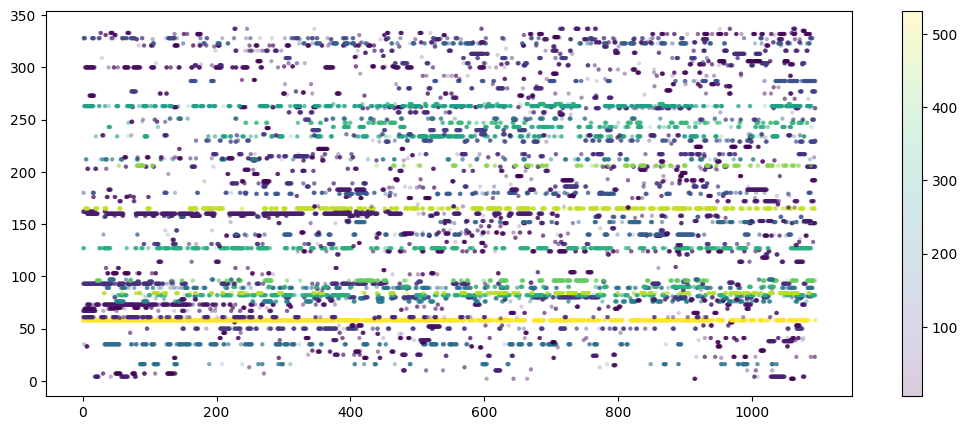

In [17]:
plt.figure(figsize=(13, 5))
plt.scatter(tt*0.2, xx, marker='.', c=sz_arr[xx], alpha=0.2, edgecolor='none')
plt.colorbar(alpha=1.0)

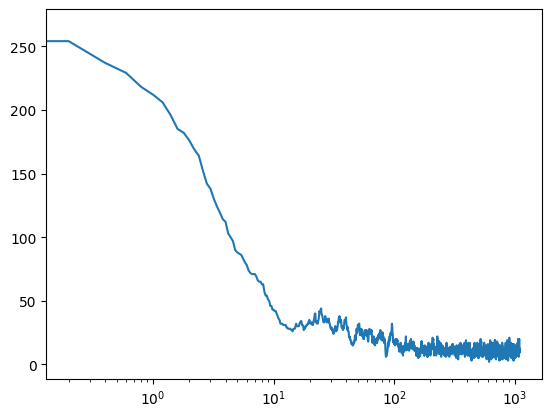

In [18]:
plt.semilogx(temporal_sim_frame.ts, temporal_sim_frame.history.sum(axis=0))



In [19]:
temporal_sim_frame.history.sum(axis=0)[0]

266.0

In [20]:
temporal_sim_frame.time_travellers.sum()

255.0